In [36]:
# univariate one step problem with lstm
from numpy import array
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
import copy
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [37]:

url = "http://www.sidc.be/silso/INFO/snmtotcsv.php"
data = pd.read_csv (url,sep =";")
loc = "Monthly Sunspots.csv"
data . to_csv (loc , index = False )
data_csv=pd. read_csv (loc , header = None )
yt= data_csv . iloc [1000:3210 ,3]
aa=yt.tolist()

In [38]:
aaa=copy.deepcopy(aa)
xmin = min(aa) 
xmax=max(aa)
for i, x in enumerate(aaa):
    aaa[i] = (x-xmin) / (xmax-xmin)

In [41]:

# define dataset
series = array(aaa)

# reshape to [10, 1]
n_features = 1
series = series.reshape((len(series), n_features))
# bbs=scaler_x . fit_transform(bb)
# x_pacf=pacf(series ,nlags=200, method='ols')
# plt.plot(x_pacf)

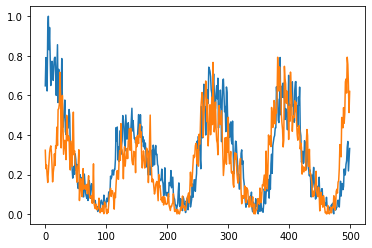

In [60]:
n_input =500
endd=1499
plt.plot(aaa[1500:2000])
bb=aaa[endd-n_input:endd]
len(bb)
plt.plot(bb)

In [68]:

# define generator

generator = TimeseriesGenerator(series, series, length=n_input, batch_size=1)
# define model
model = Sequential()
model.add(LSTM(units =500, activation = 'tanh', recurrent_activation ='hard_sigmoid', input_shape=(n_input, n_features)))
# units =4, activation = 'tanh', recurrent_activation ='hard_sigmoid',input_shape = (5 , 1)
model.add(Dense (units =1, activation = 'linear'))
model.compile ( loss ='mean_squared_error',optimizer = 'rmsprop')
# model.compile( loss ='mean_squared_error',optimizer = 'rmsprop')
# fit model
model.fit(generator, steps_per_epoch=1, epochs=800, verbose=1,shuffle = True)
# make a one step prediction out of sample


Epoch 1/500
1/1 [==============================] - 6s 6s/step - loss: 0.1473
Epoch 2/500
1/1 [==============================] - 3s 3s/step - loss: 0.0130
Epoch 3/500
1/1 [==============================] - 3s 3s/step - loss: 0.0104
Epoch 4/500
1/1 [==============================] - 3s 3s/step - loss: 6.0949e-05
Epoch 5/500
1/1 [==============================] - 3s 3s/step - loss: 0.0018
Epoch 6/500
1/1 [==============================] - 3s 3s/step - loss: 2.1268e-04
Epoch 7/500
1/1 [==============================] - 3s 3s/step - loss: 0.0021
Epoch 8/500
1/1 [==============================] - 3s 3s/step - loss: 9.3922e-04
Epoch 9/500
1/1 [==============================] - 3s 3s/step - loss: 0.0095
Epoch 10/500
1/1 [==============================] - 3s 3s/step - loss: 0.0129
Epoch 11/500
1/1 [==============================] - 3s 3s/step - loss: 0.0080
Epoch 12/500
1/1 [==============================] - 3s 3s/step - loss: 0.0087
Epoch 13/500
1/1 [==============================] - 3s 3s/ste

In [69]:

x_input = array(bb).reshape((1, n_input, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.52394724]]


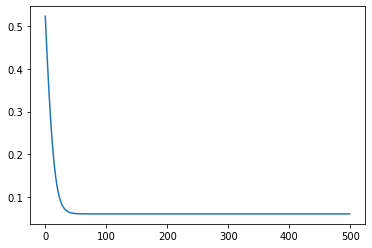

In [71]:
origin_input=copy.deepcopy(bb)
ans=[]
for i in range(0,500):
    now_input=array(origin_input).reshape((1, n_input, n_features))
    yhat = model.predict(now_input, verbose=0)
    # print(i,yhat[0][0])
    ans.append(yhat[0][0])
    origin_input.remove(origin_input[0])
    origin_input.append(yhat[0][0])
plt.plot(ans)

In [69]:
# univariate one step problem with lstm
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
# define dataset
series = array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2])
# reshape to [10, 1]
n_features = 1
series = series.reshape((len(series), n_features))
# define generator
n_input = 2
generator = TimeseriesGenerator(series, series, length=n_input, batch_size=8)
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit_generator(generator, steps_per_epoch=1, epochs=500, verbose=0)
# make a one step prediction out of sample
x_input = array([2, 1]).reshape((1, n_input, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5108\713632650.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, steps_per_epoch=1, epochs=500, verbose=0)


[[0.9999995]]


In [70]:
x_input = array([2, 1]).reshape((1, n_input, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[2.0000002]]
